In [1]:
import numpy as np
import pickle as pk
import matplotlib
import matplotlib.pyplot as pl
from astropy import units
from astropy import constants
from astropy.io import fits
# %pylab inline

# Color = ['#0072b1','#009d73','#d45e00','k', 'grey','yellow']

Color = ['k', '#000075', '#a9a9a9','#9A6324', '#808000','#aaffc3', '#fffac8'  ,'#800000', '#ffd8b1',]

font = {'size'   : 18}
matplotlib.rc('font', **font)
# Latex stuff
pl.rc('text', usetex=True)
pl.rc('font', family='serif')






 




[1.05819000e+00 1.18134217e+00 1.31882678e+00 1.47231185e+00
 1.64365951e+00 1.83494862e+00 2.04849995e+00 2.28690439e+00
 2.55305435e+00 2.85017883e+00 3.18188267e+00 3.55219020e+00
 3.96559412e+00 4.42711000e+00 4.94233710e+00 5.51752633e+00
 6.15965608e+00 6.87651691e+00 7.67680600e+00 8.57023275e+00
 9.56763650e+00 1.06811181e+01 1.19241867e+01 1.33119237e+01
 1.48611655e+01 1.65907080e+01 1.85215348e+01 2.06770711e+01
 2.30834688e+01 2.57699231e+01 2.87690270e+01 3.21171666e+01
 3.58549627e+01 4.00277635e+01 4.46861949e+01 4.98867747e+01
 5.56925979e+01 6.21741029e+01 6.94099255e+01 7.74878532e+01
 8.65058902e+01 9.65734464e+01 1.07812665e+02 1.20359904e+02
 1.34367390e+02 1.50005068e+02 1.67462659e+02 1.86951965e+02
 2.08709436e+02 2.32999042e+02 2.60115472e+02 2.90387713e+02
 3.24183037e+02 3.61911462e+02 4.04030721e+02 4.51051819e+02
 5.03545234e+02 5.62147832e+02 6.27570601e+02 7.00607273e+02
 7.82143953e+02 8.73169872e+02 9.74789389e+02 1.08823539e+03
 1.21488423e+03 1.356272

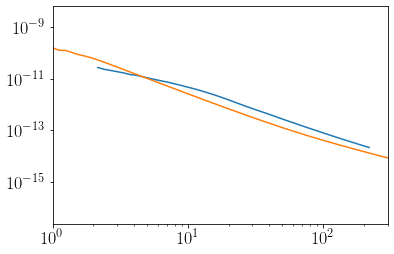

In [34]:
from twobessel import *
import matplotlib.pyplot as plt
# load data
df = np.load('/Users/shivam/Downloads/results_block_ell_gty_acty3_beamed_v2_nfw_bt1_testcov_matchth.npz')

# get ell and Cl space gaussian covariance
ell = df['theory_ell'][:-1]
print(ell)
ell = log_extrap(ell, 10,10)
nl = len(ell)
dlnk = np.log(ell[1]/ell[0])
print(dlnk)
Cl_kk_11 = df['theory_clkk_bin_1_1'][:-1]
cov_total = df['covg_kk_kk_bin_1_1'][:-1,:][:,:-1]

cov_total = np.diag(log_extrap(np.diag(cov_total), 10, 10))

ell_mat = np.tile(ell.reshape(nl,1),(1,nl))
ell1_ell2 = ell_mat * ell_mat.T

print(cov_total)

th = df['theory_theta'] 
cov_g = df['real_covg_kk_kk_bin_1_1']
plt.plot(th, np.diag(cov_g))
newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
t1, t2, cov_fft = newtwobessel.two_Bessel_binave(0,0,dlnk,dlnk)
# plt.plot(t1/np.pi*180*60, np.diag(cov_fft))
plt.plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.diag(cov_fft)[:-1])


plt.xlim(1,300)
plt.xscale('log')
plt.yscale('log')
plt.show()






In [15]:
'c1' == 2


False

[1.12945735e+00 1.42189046e+00 1.79003880e+00 2.25350616e+00
 2.83697203e+00 3.57150579e+00 4.49622113e+00 5.66035888e+00
 7.12590899e+00 8.97091158e+00 1.12936124e+01 1.42176947e+01
 1.78988649e+01 2.25331441e+01 2.83673063e+01 3.57120189e+01
 4.49583855e+01 5.65987724e+01 7.12530265e+01 8.97014825e+01
 1.12926515e+02 1.42164849e+02 1.78973419e+02 2.25312268e+02
 2.83648926e+02 3.57089802e+02 4.49545600e+02 5.65939564e+02
 7.12469637e+02 8.96938498e+02 1.12916906e+03 1.42152753e+03
 1.78958190e+03 2.25293096e+03 2.83624790e+03 3.57059417e+03]
[[6.76256024e-15 7.20336116e-21 7.11903941e-21 ... 1.96172044e-25
  9.40929592e-26 4.39488203e-26]
 [7.20336116e-21 4.82605569e-15 7.06358138e-21 ... 1.96168856e-25
  9.40916122e-26 4.39482570e-26]
 [7.11903941e-21 7.06358138e-21 3.37067775e-15 ... 1.96164101e-25
  9.40896027e-26 4.39474167e-26]
 ...
 [1.96172044e-25 1.96168856e-25 1.96164101e-25 ... 1.01710636e-22
  2.12161314e-27 1.13485094e-27]
 [9.40929592e-26 9.40916122e-26 9.40896027e-26 ..

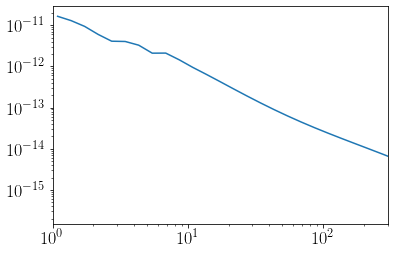

In [25]:
df = np.load('/Users/shivam/Downloads/results_block_ell_gty_acty3_beamed_v2_nfw_bt1_testcov_matchth_nocov.npz')

# get ell and Cl space gaussian covariance
ell = df['theory_ell_survey'][:-1]
print(ell)
# ell = log_extrap(ell, 10,10)
nl = len(ell)
dlnk = np.log(ell[1]/ell[0])
Cl_kk_11 = df['theory_clkk_bin_1_1'][:-1]
cov_total = df['cov_total_kk_kk_bin_1_1'][:-1,:][:,:-1]

ell_mat = np.tile(ell.reshape(nl,1),(1,nl))
ell1_ell2 = ell_mat * ell_mat.T
# cov_total = np.diag(log_extrap(np.diag(cov_total), 10, 10))
# cov_total = bilinear_extra_P(cov_total, 10, 10)

print(cov_total)

# th = df['theory_theta'] 
# cov_g = df['real_covg_kk_kk_bin_1_1']
# plt.plot(th, np.diag(cov_g))
newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
t1, t2, cov_fft = newtwobessel.two_Bessel_binave(0,0,dlnk,dlnk)
# plt.plot(t1/np.pi*180*60, np.diag(cov_fft))
plt.plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.diag(cov_fft)[:-1])


plt.xlim(1,300)
plt.xscale('log')
plt.yscale('log')
plt.show()







[1.12945735e+00 1.42189046e+00 1.79003880e+00 2.25350616e+00
 2.83697203e+00 3.57150579e+00 4.49622113e+00 5.66035888e+00
 7.12590899e+00 8.97091158e+00 1.12936124e+01 1.42176947e+01
 1.78988649e+01 2.25331441e+01 2.83673063e+01 3.57120189e+01
 4.49583855e+01 5.65987724e+01 7.12530265e+01 8.97014825e+01
 1.12926515e+02 1.42164849e+02 1.78973419e+02 2.25312268e+02
 2.83648926e+02 3.57089802e+02 4.49545600e+02 5.65939564e+02
 7.12469637e+02 8.96938498e+02 1.12916906e+03 1.42152753e+03
 1.78958190e+03 2.25293096e+03 2.83624790e+03 3.57059417e+03]
36 36
(2036, 2036)
2036 2036
SNR y-gt bin1=12.44 sigma
36 36
(2036, 2036)
2036 2036
SNR y-gt bin2=13.81 sigma
36 36
(2036, 2036)
2036 2036
SNR y-gt bin3=17.88 sigma
36 36
(2036, 2036)
2036 2036
SNR y-gt bin4=19.76 sigma
36 36
(2036, 2036)
2036 2036
36 36
(2036, 2036)
2036 2036
36 36
(2036, 2036)
2036 2036
36 36
(2036, 2036)
2036 2036


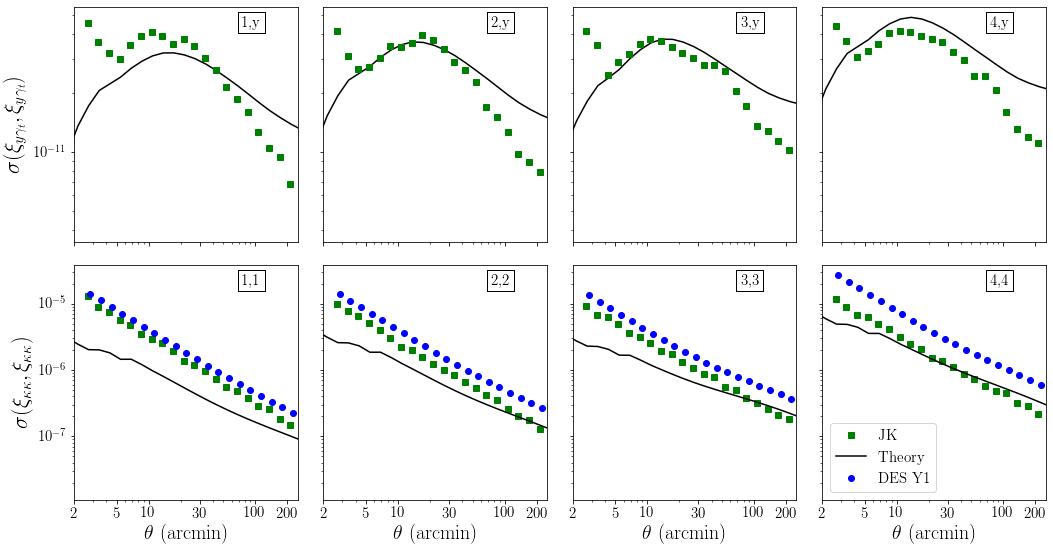

In [36]:
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))

import pickle as pk
import numpy as np
try:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'))
except:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'),encoding='latin1')

block_res = np.load('/Users/shivam/Downloads/results_block_ell_gty_acty3_beamed_v2_nfw_bt1_testcov_matchth_nocov.npz')

# get ell and Cl space gaussian covariance
ell = block_res['theory_ell_survey'][:-1]
print(ell)
# ell = log_extrap(ell, 10,10)
nl = len(ell)
dlnk = np.log(ell[1]/ell[0])
ell_mat = np.tile(ell.reshape(nl,1),(1,nl))
ell1_ell2 = ell_mat * ell_mat.T



# plt.plot(t1/np.pi*180*60, np.diag(cov_fft))


from astropy.io import fits
desy1 = fits.open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src/data/2pt_NG_desy1.fits')




nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
        
        bin1 = desy1['xip'].data['BIN1']
        bin2 = desy1['xip'].data['BIN2']
        ind_sel = np.where((bin1 == bins[j2]) & (bin2 == bins[j2]))[0]
        
        ind_sel1 = np.where((bin1 == bins[j2]))[0]
        ind_sel2 = np.where((bin2 == bins[j2]))[0]
        data_val = desy1['xip'].data['VALUE'][ind_sel]
        data_ang = desy1['xip'].data['ANG'][ind_sel]
        cov = desy1['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]
#         sig = np.sqrt(np.diag(cov[ind_sel1,:][:,ind_sel2]))
        sig = np.sqrt(np.diag(cov))

        if j1 == 0:
         
            cov_total = block_res['cov_total_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
            newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
            t1, t2, cov_fft = newtwobessel.two_Bessel_binave(2,2,dlnk,dlnk)
            ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls='-',color='k',label='Theory')
            
            
            yk_g = df['Yshear_y3'][str(j2)]['xip']
            yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y3'][str(j2)]['err']
            
            yk_cov = df['Yshear_y3'][str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            
            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            
            
            
        if j1 == 1:
            yk_g = df['shearshear_y3'][str(j2)+'_'+str(j2)]['xip']
            yk_th_g = df['shearshear_y3'][str(j2)+'_'+str(j2)]['theta'] * 180. /np.pi
            yk_err = df['shearshear_y3'][str(j2)+'_'+str(j2)]['err']
#             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='o',color='blue',label='DES Y1')
            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            
            cov_total = block_res['cov_total_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
            newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
            t1, t2, cov_fft = newtwobessel.two_Bessel_binave(0,0,dlnk,dlnk)
            ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls='-',color='k',label='Theory')
#             ax[j1,j2].plot(data_ang, sig, ls='',marker='o',color='blue',label='DES Y1')


#             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='s',color='green',label='DES Y1')
            
        ax[j1,j2].set_xscale('log')
#         if j1 == 1:
        ax[j1,j2].set_yscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\sigma(\xi_{y\gamma_t},\xi_{y\gamma_t})$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\sigma(\xi_{\kappa \kappa},\xi_{\kappa \kappa})$ ', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_ygt_kk_allbins_err_comp.pdf')















0


NameError: name 'desy1' is not defined

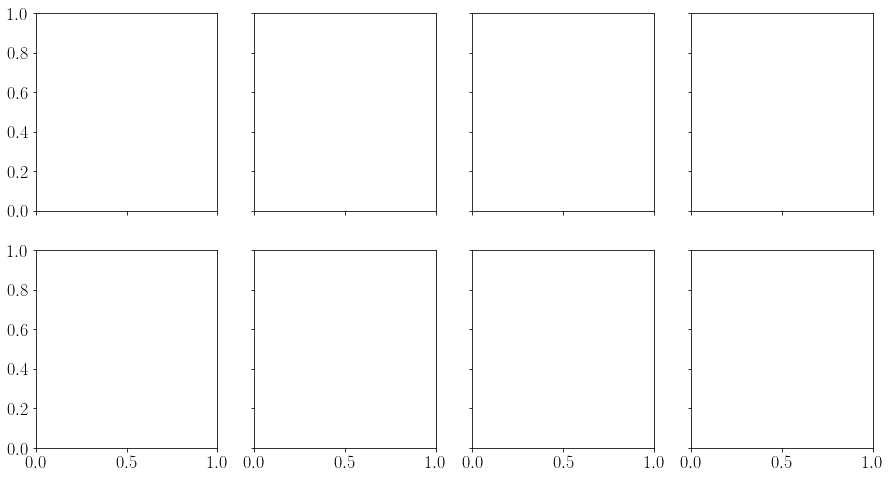

In [2]:
from twobessel import *
import matplotlib.pyplot as plt

def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))

import pickle as pk
import numpy as np
try:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'))
except:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'),encoding='latin1')

block_res = np.load('/Users/shivam/Downloads/results_block_ell_gty_plancky3_beamed_v2_nfw_bt1_testcov_matchth_nocov.npz')

# get ell and Cl space gaussian covariance
isodd = 0
ell_temp = block_res['theory_ell_survey']

if np.mod(len(ell_temp),2) > 0:
    isodd = 1
    ell = block_res['theory_ell_survey'][:-1]
    print(len(ell),len(ell_temp))
else:
    ell = block_res['theory_ell_survey']


print(np.mod(len(ell_temp),2))    
# ell = log_extrap(ell, 10,10)
nl = len(ell)
dlnk = np.log(ell[1]/ell[0])
ell_mat = np.tile(ell.reshape(nl,1),(1,nl))
ell1_ell2 = ell_mat * ell_mat.T



# plt.plot(t1/np.pi*180*60, np.diag(cov_fft))


from astropy.io import fits
# desy1 = fits.open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src/data/2pt_NG_desy1.fits')




nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
        
        bin1 = desy1['xip'].data['BIN1']
        bin2 = desy1['xip'].data['BIN2']
        ind_sel = np.where((bin1 == bins[j2]) & (bin2 == bins[j2]))[0]
        
        ind_sel1 = np.where((bin1 == bins[j2]))[0]
        ind_sel2 = np.where((bin2 == bins[j2]))[0]
        data_val = desy1['xip'].data['VALUE'][ind_sel]
        data_ang = desy1['xip'].data['ANG'][ind_sel]
        cov = desy1['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]
#         sig = np.sqrt(np.diag(cov[ind_sel1,:][:,ind_sel2]))
        sig = np.sqrt(np.diag(cov))

        if j1 == 0:
             
            if isodd:
                cov_total = block_res['cov_total_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
            else:
                cov_total = block_res['cov_total_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
            t1, t2, cov_fft = newtwobessel.two_Bessel_binave(2,2,dlnk,dlnk)
            ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls='',color='k',label='Theory')
            
            
            yk_g = df['Yshear_y3'][str(j2)]['xip']
            yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y3'][str(j2)]['err']
            
            yk_cov = df['Yshear_y3'][str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            
            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            ax[j1,j2].set_ylim(8e-12,8.0e-11)
            
            
            
        if j1 == 1:
            yk_g = df['shearshear_y3'][str(j2)+'_'+str(j2)]['xip']
            yk_th_g = df['shearshear_y3'][str(j2)+'_'+str(j2)]['theta'] * 180. /np.pi
            yk_err = df['shearshear_y3'][str(j2)+'_'+str(j2)]['err']
#             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='o',color='blue',label='DES Y1')
            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            
            if isodd:
                cov_total = block_res['cov_total_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
            else:
                cov_total = block_res['cov_total_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])]

            newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
            t1, t2, cov_fft = newtwobessel.two_Bessel_binave(0,0,dlnk,dlnk)
            ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls='-',color='k',label='Theory')
#             ax[j1,j2].plot(data_ang, sig, ls='',marker='o',color='blue',label='DES Y1')
            ax[j1,j2].set_ylim(1e-7,1e-4)


#             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='s',color='green',label='DES Y1')
            
        ax[j1,j2].set_xscale('log')
        if j1 == 1:
            ax[j1,j2].set_yscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\sigma(\xi_{y\gamma_t},\xi_{y\gamma_t})$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\sigma(\xi_{\kappa \kappa},\xi_{\kappa \kappa})$ ', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_ygt_kk_allbins_err_comp.pdf')
















0
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
SNR y-gt bin1=8.32 sigma
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
SNR y-gt bin2=11.56 sigma
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
SNR y-gt bin3=15.04 sigma
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
SNR y-gt bin4=10.97 sigma
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096


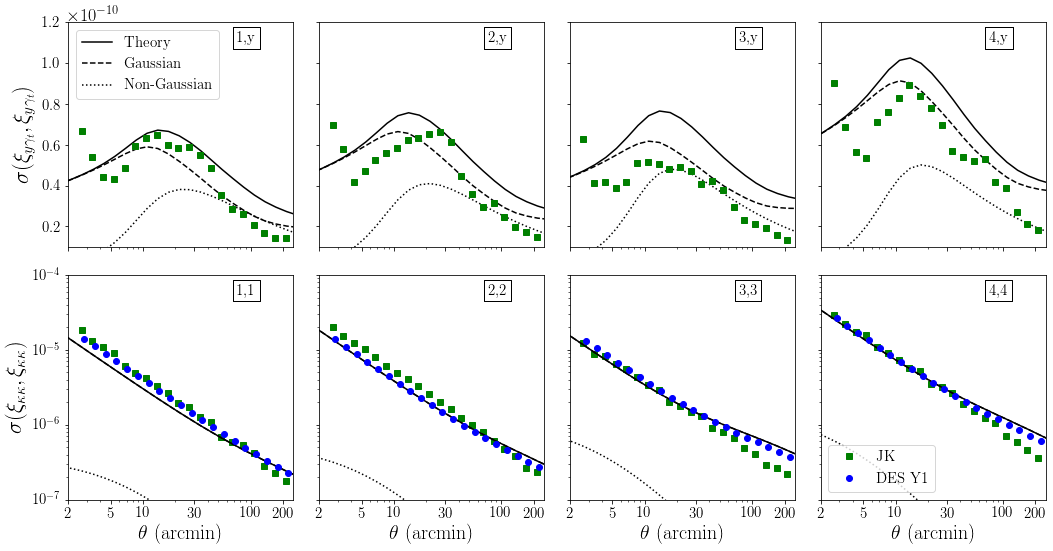

In [16]:
from twobessel import *
import matplotlib.pyplot as plt

def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))

import pickle as pk
import numpy as np
try:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'))
except:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'),encoding='latin1')

block_res = np.load('/Users/shivam/Downloads/results_block_ell_gty_plancky1_beamed_v2_nfw_bt1_testcov_matchth_nocov.npz')

# get ell and Cl space gaussian covariance
isodd = 0
ell_temp = block_res['theory_ell_survey']

if np.mod(len(ell_temp),2) > 0:
    isodd = 1
    ell = block_res['theory_ell_survey'][:-1]
    print(len(ell),len(ell_temp))
else:
    ell = block_res['theory_ell_survey']


print(np.mod(len(ell_temp),2))    
# ell = log_extrap(ell, 10,10)
nl = len(ell)
dlnk = np.log(ell[1]/ell[0])
ell_mat = np.tile(ell.reshape(nl,1),(1,nl))
ell1_ell2 = ell_mat * ell_mat.T



# plt.plot(t1/np.pi*180*60, np.diag(cov_fft))


from astropy.io import fits
desy1 = fits.open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src/data/2pt_NG_desy1.fits')




nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):
        
        bin1 = desy1['xip'].data['BIN1']
        bin2 = desy1['xip'].data['BIN2']
        ind_sel = np.where((bin1 == bins[j2]) & (bin2 == bins[j2]))[0]
        
        ind_sel1 = np.where((bin1 == bins[j2]))[0]
        ind_sel2 = np.where((bin2 == bins[j2]))[0]
        data_val = desy1['xip'].data['VALUE'][ind_sel]
        data_ang = desy1['xip'].data['ANG'][ind_sel]
        cov = desy1['COVMAT'].data[0:200,0:200][ind_sel,:][:,ind_sel]
#         sig = np.sqrt(np.diag(cov[ind_sel1,:][:,ind_sel2]))
        sig = np.sqrt(np.diag(cov))

        if j1 == 0:
             
            if isodd:
                cov_total = block_res['cov_total_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
            else:
                cov_total = block_res['cov_total_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
            t1, t2, cov_fft = newtwobessel.two_Bessel_binave(2,2,dlnk,dlnk)
            ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls='-',color='k',label='Theory')

            
            if isodd:
                cov_total = block_res['covg_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
            else:
                cov_total = block_res['covg_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
            t1, t2, cov_fft = newtwobessel.two_Bessel_binave(2,2,dlnk,dlnk)
            ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls='--',color='k',label='Gaussian')
            
            
            if isodd:
                cov_total = block_res['covng_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
            else:
                cov_total = block_res['covng_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
            t1, t2, cov_fft = newtwobessel.two_Bessel_binave(2,2,dlnk,dlnk)
            ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls=':',color='k',label='Non-Gaussian')
            
            yk_g = df['Yshear_y1'][str(j2)]['xip']
            yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y1'][str(j2)]['err']
            
            yk_cov = df['Yshear_y1'][str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            
            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green')
            ax[j1,j2].set_ylim(1e-11,1.2e-10)
            
            
            
        if j1 == 1:
            yk_g = df['shearshear_y1'][str(j2)+'_'+str(j2)]['xip']
            yk_th_g = df['shearshear_y1'][str(j2)+'_'+str(j2)]['theta'] * 180. /np.pi
            yk_err = df['shearshear_y1'][str(j2)+'_'+str(j2)]['err']
#             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='o',color='blue',label='DES Y1')
            ax[j1,j2].plot(yk_th_g, yk_err, ls='',marker='s',color='green',label='JK')
            
            if isodd:
                cov_total = block_res['cov_total_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
            else:
                cov_total = block_res['cov_total_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
            t1, t2, cov_fft = newtwobessel.two_Bessel_binave(0,0,dlnk,dlnk)
            ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls='-',color='k')

            
            if isodd:
                cov_total = block_res['covg_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
            else:
                cov_total = block_res['covg_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
            t1, t2, cov_fft = newtwobessel.two_Bessel_binave(0,0,dlnk,dlnk)
            ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls='--',color='k')
            
            
            if isodd:
                cov_total = block_res['covng_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
            else:
                cov_total = block_res['covng_kk_kk_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
            t1, t2, cov_fft = newtwobessel.two_Bessel_binave(0,0,dlnk,dlnk)
            ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls=':',color='k')
            
            
            ax[j1,j2].plot(data_ang, sig, ls='',marker='o',color='blue',label='DES Y1')
            ax[j1,j2].set_ylim(1e-7,1e-4)


#             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='s',color='green',label='DES Y1')
            
        ax[j1,j2].set_xscale('log')
        if j1 == 1:
            ax[j1,j2].set_yscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,5,10,30,100,200])
            labels_bottom = ticks
            ax[0,j2].set_xticks(ticks)
            ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1,j2].set_xticks(ticks)
            ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\sigma(\xi_{y\gamma_t},\xi_{y\gamma_t})$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\sigma(\xi_{\kappa \kappa},\xi_{\kappa \kappa})$ ', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
ax[0,0].legend(fontsize=15,loc='upper left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

fig.savefig('xi_ygt_kk_allbins_sigma_comp.pdf')












0
96 96
(2096, 2096)
2096 2096
SNR y-gt Y3 bin1=11.83 sigma
Battaglia12 bin1, reduced chi2=1.3
LeBrun15 Ref bin1, reduced chi2=1.59
LeBrun15 AGN bin1, reduced chi2=1.32
96 96
(2096, 2096)
2096 2096
SNR y-gt Y3 bin2=14.67 sigma
Battaglia12 bin2, reduced chi2=5.8
LeBrun15 Ref bin2, reduced chi2=5.31
LeBrun15 AGN bin2, reduced chi2=5.53
96 96
(2096, 2096)
2096 2096
SNR y-gt Y3 bin3=14.52 sigma
Battaglia12 bin3, reduced chi2=5.18
LeBrun15 Ref bin3, reduced chi2=3.33
LeBrun15 AGN bin3, reduced chi2=4.38
96 96
(2096, 2096)
2096 2096
SNR y-gt Y3 bin4=14.73 sigma
Battaglia12 bin4, reduced chi2=3.18
LeBrun15 Ref bin4, reduced chi2=2.0
LeBrun15 AGN bin4, reduced chi2=2.4


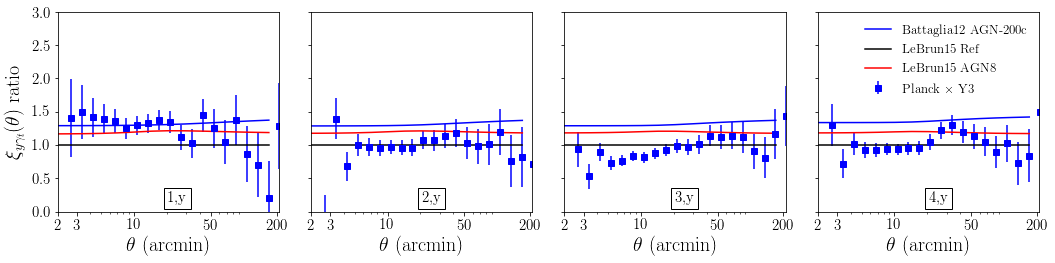

In [22]:
import scipy.interpolate as interpolate
from twobessel import *
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))
try:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'))
except:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'),encoding='latin1')


wtheta_yk_dict_Plancky3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_Plancky3_beamed_v2.npz')
wtheta_ygt_dict_Plancky3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_Plancky3_beamed_v2.npz')
wtheta_kk_dict_Plancky3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_Plancky3_beamed_v2.npz')



wtheta_yk_dict_Plancky3_beamed_LeBrun_Ref = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_Plancky3_beamed_LeBrun_Ref.npz')
wtheta_ygt_dict_Plancky3_beamed_LeBrun_Ref = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_Plancky3_beamed_LeBrun_Ref.npz')
wtheta_kk_dict_Plancky3_beamed_LeBrun_Ref = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_Plancky3_beamed_LeBrun_Ref.npz')


wtheta_yk_dict_Plancky3_beamed_LeBrun_AGN8 = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_Plancky3_beamed_LeBrun_AGN8.npz')
wtheta_ygt_dict_Plancky3_beamed_LeBrun_AGN8 = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_Plancky3_beamed_LeBrun_AGN8.npz')
wtheta_kk_dict_Plancky3_beamed_LeBrun_AGN8 = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_Plancky3_beamed_LeBrun_AGN8.npz')


block_res = np.load('/Users/shivam/Downloads/results_block_ell_gty_plancky3_beamed_v2_nfw_bt1_testcov_matchth_nocov.npz')

# get ell and Cl space gaussian covariance
isodd = 0
ell_temp = block_res['theory_ell_survey']

if np.mod(len(ell_temp),2) > 0:
    isodd = 1
    ell = block_res['theory_ell_survey'][:-1]
    print(len(ell),len(ell_temp))
else:
    ell = block_res['theory_ell_survey']


print(np.mod(len(ell_temp),2))    
# ell = log_extrap(ell, 10,10)
nl = len(ell)
dlnk = np.log(ell[1]/ell[0])
ell_mat = np.tile(ell.reshape(nl,1),(1,nl))
ell1_ell2 = ell_mat * ell_mat.T


nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(1):    
    for j2 in range(4):

        wtheta_yk_Plancky3_beamed = wtheta_yk_dict_Plancky3_beamed[ str(bins[j2]) + '-tot']
        wtheta_ygt_Plancky3_beamed = wtheta_ygt_dict_Plancky3_beamed[ str(bins[j2]) + '-tot']
        wtheta_kk_Plancky3_beamed = wtheta_kk_dict_Plancky3_beamed[ str(bins[j2]) + '-tot']

        wtheta_yk_Plancky3_beamed_LeBrun_Ref = wtheta_yk_dict_Plancky3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        wtheta_ygt_Plancky3_beamed_LeBrun_Ref = wtheta_ygt_dict_Plancky3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        wtheta_kk_Plancky3_beamed_LeBrun_Ref = wtheta_kk_dict_Plancky3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        
        
        
        wtheta_yk_Plancky3_beamed_LeBrun_AGN8 = wtheta_yk_dict_Plancky3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        wtheta_ygt_Plancky3_beamed_LeBrun_AGN8 = wtheta_ygt_dict_Plancky3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        wtheta_kk_Plancky3_beamed_LeBrun_AGN8 = wtheta_kk_dict_Plancky3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        
        theta = wtheta_yk_dict_Plancky3_beamed_LeBrun_Ref['theta_arcmin']
    
        if j1 == 0:
            
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
#             ax[j1,j2].errorbar(theta, wtheta_ygt_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')
            ax[j2].errorbar(theta, wtheta_ygt_Plancky3_beamed/wtheta_ygt_Plancky3_beamed_LeBrun_Ref, ls='-',color='b',label='Battaglia12 AGN-200c')
            ax[j2].errorbar(theta, wtheta_ygt_Plancky3_beamed_LeBrun_Ref/wtheta_ygt_Plancky3_beamed_LeBrun_Ref, ls='-',color='k',label='LeBrun15 Ref')
            ax[j2].errorbar(theta, wtheta_ygt_Plancky3_beamed_LeBrun_AGN8/wtheta_ygt_Plancky3_beamed_LeBrun_Ref, ls='-',color='r',label='LeBrun15 AGN8')
            
            wt_b12_intp = interpolate.interp1d(np.log(theta),np.log(wtheta_ygt_Plancky3_beamed),fill_value='extrapolate')
            wt_LBref_intp = interpolate.interp1d(np.log(theta),np.log(wtheta_ygt_Plancky3_beamed_LeBrun_Ref),fill_value='extrapolate')
            wt_LBagn_intp = interpolate.interp1d(np.log(theta),np.log(wtheta_ygt_Plancky3_beamed_LeBrun_AGN8),fill_value='extrapolate')
            
            if isodd:
                cov_total = block_res['cov_total_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
            else:
                cov_total = block_res['cov_total_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
            t1, t2, cov_fft = newtwobessel.two_Bessel_binave(2,2,dlnk,dlnk)
#             ax[j1,j2].plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.sqrt(np.diag(cov_fft)[:-1]), ls='',marker='o',color='k',label='Theory')
            

            yk_g = df['Yshear_y3'][str(j2)]['xip']
            yk_th_g = df['Yshear_y3'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y3'][str(j2)]['err']
            
            
            wtheta_ygt_Plancky3_beamed_LeBrun_Ref_interp = interpolate.interp1d(np.log(theta),np.log(wtheta_ygt_Plancky3_beamed_LeBrun_Ref),fill_value='extrapolate')
            wtheta_ygt_Plancky3_beamed_LeBrun_Ref_data = np.exp(wtheta_ygt_Plancky3_beamed_LeBrun_Ref_interp(np.log(yk_th_g)))
            
            wt_b12 = np.exp(wt_b12_intp(np.log(yk_th_g)))
            wt_LBref = np.exp(wt_LBref_intp(np.log(yk_th_g)))
            wt_LBagn = np.exp(wt_LBagn_intp(np.log(yk_th_g)))
            
#             ax[j2].errorbar(yk_th_g, yk_g/wtheta_ygt_Plancky3_beamed_LeBrun_Ref_data,yerr=yk_err/wtheta_ygt_Plancky3_beamed_LeBrun_Ref_data, ls='',marker='s',color='blue',label=r'Planck $\times$ Y3') 
            th_theory_cov = (t1[:-1]+t1[1:])/2./np.pi*180*60
            ind_sel = np.where( (th_theory_cov > 2.5) & (th_theory_cov < 250.) )[0]
#             import pdb; pdb.set_trace()
            theory_cov = cov_fft[ind_sel,:][:,ind_sel]
    
            yk_cov = theory_cov
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt Y3 bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            
            yk_cov = theory_cov
            inv_cov_bin = QR_inverse(yk_cov)
            
            
            
#             yk_cov = np.diag(np.diag(theory_cov))
#             inv_cov_bin = QR_inverse(yk_cov)
            
            snr_bin = (np.dot(np.array([yk_g-wt_b12]), np.dot(inv_cov_bin, np.array([yk_g-wt_b12]).T)))
            print('Battaglia12 bin' + str(j2+1)  + ', reduced chi2=' + str(np.round(snr_bin[0][0]/20.,2)) )            
            snr_bin = (np.dot(np.array([yk_g-wt_LBref]), np.dot(inv_cov_bin, np.array([yk_g-wt_LBref]).T)))
            print('LeBrun15 Ref bin' + str(j2+1)  + ', reduced chi2=' + str(np.round(snr_bin[0][0]/20.,2)))
            snr_bin = (np.dot(np.array([yk_g-wt_LBagn]), np.dot(inv_cov_bin, np.array([yk_g-wt_LBagn]).T)))
            print('LeBrun15 AGN bin' + str(j2+1)  + ', reduced chi2=' + str(np.round(snr_bin[0][0]/20.,2)))
    
            ax[j2].errorbar(yk_th_g, yk_g/wtheta_ygt_Plancky3_beamed_LeBrun_Ref_data,yerr=np.sqrt(np.diag(theory_cov))/wtheta_ygt_Plancky3_beamed_LeBrun_Ref_data, ls='',marker='s',color='blue',label=r'Planck $\times$ Y3') 

            ax[j2].set_ylim(0,3)
            
#             import pdb; pdb.set_trace()
#             ax[j2].set_ylim(1e-11,2e-9)
            
            
            
#         if j1 == 2:
#             ax[j1,j2].plot(theta, wtheta_kk_Plancky3_beamed , ls='-',color='k',label='')
            
# #             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k')
# #             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k')

#             ax[j1,j2].set_ylim(1e-7,4e-4)
            
        ax[j2].set_xscale('log')
#         ax[j2].set_yscale('log')
        
        if j1 == 0:
            ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
            ticks  = np.array([2,3,10,50,200])
            labels_bottom = ticks
            ax[0].set_xticks(ticks)
            ax[0].set_xticklabels(labels_bottom,  fontsize=15)
            ax[1].set_xticks(ticks)
            ax[1].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j2].set_xlim((2.,210))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[j2].text( 0.5, 0.1,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[1].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ratio', size = 20)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
ax[3].legend(fontsize=13,frameon=False)
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_ygt_allbins_model_planckxy3_ratio.png',dpi=240)
# fig.savefig('xi_yk_ygt_allbins_model_planckxy3_ratio.pdf')

















0
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096


/Users/shivam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


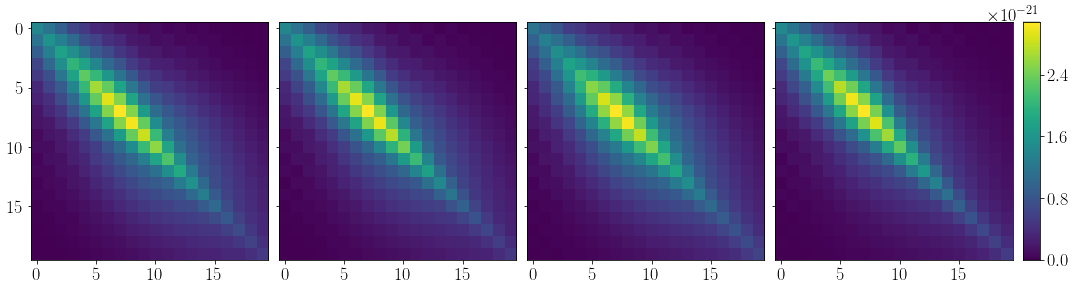

In [15]:
import scipy.interpolate as interpolate
from twobessel import *
from mpl_toolkits.axes_grid1 import ImageGrid
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))
try:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'))
except:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'),encoding='latin1')


wtheta_yk_dict_Plancky3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_Plancky3_beamed_v2.npz')
wtheta_ygt_dict_Plancky3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_Plancky3_beamed_v2.npz')
wtheta_kk_dict_Plancky3_beamed = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_Plancky3_beamed_v2.npz')



wtheta_yk_dict_Plancky3_beamed_LeBrun_Ref = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_Plancky3_beamed_LeBrun_Ref.npz')
wtheta_ygt_dict_Plancky3_beamed_LeBrun_Ref = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_Plancky3_beamed_LeBrun_Ref.npz')
wtheta_kk_dict_Plancky3_beamed_LeBrun_Ref = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_Plancky3_beamed_LeBrun_Ref.npz')


wtheta_yk_dict_Plancky3_beamed_LeBrun_AGN8 = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_ky_Plancky3_beamed_LeBrun_AGN8.npz')
wtheta_ygt_dict_Plancky3_beamed_LeBrun_AGN8 = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_xi_gty_Plancky3_beamed_LeBrun_AGN8.npz')
wtheta_kk_dict_Plancky3_beamed_LeBrun_AGN8 = np.load('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results_wtheta_kk_Plancky3_beamed_LeBrun_AGN8.npz')


block_res = np.load('/Users/shivam/Downloads/results_block_ell_gty_plancky3_beamed_v2_nfw_bt1_testcov_matchth_nocov.npz')

# get ell and Cl space gaussian covariance
isodd = 0
ell_temp = block_res['theory_ell_survey']

if np.mod(len(ell_temp),2) > 0:
    isodd = 1
    ell = block_res['theory_ell_survey'][:-1]
    print(len(ell),len(ell_temp))
else:
    ell = block_res['theory_ell_survey']


print(np.mod(len(ell_temp),2))    
# ell = log_extrap(ell, 10,10)
nl = len(ell)
dlnk = np.log(ell[1]/ell[0])
ell_mat = np.tile(ell.reshape(nl,1),(1,nl))
ell1_ell2 = ell_mat * ell_mat.T


nbins = 4
bins = (np.arange(4) + 1).astype(int)
# fig, ax = pl.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
fig = pl.figure(figsize=(15,4))
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,4),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(1):    
    for j2 in range(4):

        wtheta_yk_Plancky3_beamed = wtheta_yk_dict_Plancky3_beamed[ str(bins[j2]) + '-tot']
        wtheta_ygt_Plancky3_beamed = wtheta_ygt_dict_Plancky3_beamed[ str(bins[j2]) + '-tot']
        wtheta_kk_Plancky3_beamed = wtheta_kk_dict_Plancky3_beamed[ str(bins[j2]) + '-tot']

        wtheta_yk_Plancky3_beamed_LeBrun_Ref = wtheta_yk_dict_Plancky3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        wtheta_ygt_Plancky3_beamed_LeBrun_Ref = wtheta_ygt_dict_Plancky3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        wtheta_kk_Plancky3_beamed_LeBrun_Ref = wtheta_kk_dict_Plancky3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        
        
        
        wtheta_yk_Plancky3_beamed_LeBrun_AGN8 = wtheta_yk_dict_Plancky3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        wtheta_ygt_Plancky3_beamed_LeBrun_AGN8 = wtheta_ygt_dict_Plancky3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        wtheta_kk_Plancky3_beamed_LeBrun_AGN8 = wtheta_kk_dict_Plancky3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        
        theta = wtheta_yk_dict_Plancky3_beamed_LeBrun_Ref['theta_arcmin']
    
        if j1 == 0:

            
            
            if isodd:
                cov_total = block_res['cov_total_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
            else:
                cov_total = block_res['cov_total_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
            t1, t2, cov_fft = newtwobessel.two_Bessel_binave(2,2,dlnk,dlnk)

            th_theory_cov = (t1[:-1]+t1[1:])/2./np.pi*180*60
            ind_sel = np.where( (th_theory_cov > 2.5) & (th_theory_cov < 250.) )[0]
            theory_cov = cov_fft[ind_sel,:][:,ind_sel]
    
            
            im = grid[j2].imshow(np.log(theory_cov ))

        
#         if j1 == 0:
#             ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
#             ticks  = np.array([2,3,10,50,200])
#             labels_bottom = ticks
#             ax[0].set_xticks(ticks)
#             ax[0].set_xticklabels(labels_bottom,  fontsize=15)
#             ax[1].set_xticks(ticks)
#             ax[1].set_xticklabels(labels_bottom,  fontsize=15)
            
#         ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
#         ax[j2].tick_params(axis='both', which='major', labelsize=15)
# #         ax[0,0].legend(fontsize = 18, frameon = False)
#         ax[j2].set_xlim((2.,210))
        

# #         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
#         ax[j2].text( 0.5, 0.1,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
# #         ax[1].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
# #         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

    
# fig.subplots_adjust(bottom=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# Colorbar
grid[j2].cax.colorbar(im)
grid[j2].cax.toggle_label(True)
# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
# ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ratio', size = 20)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
# ax[3].legend(fontsize=13,frameon=False)
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_ygt_allbins_model_planckxy3_ratio.png',dpi=240)
# fig.savefig('xi_yk_ygt_allbins_model_planckxy3_ratio.pdf')


















0
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096
96 96
(2096, 2096)
2096 2096


/Users/shivam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:143: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


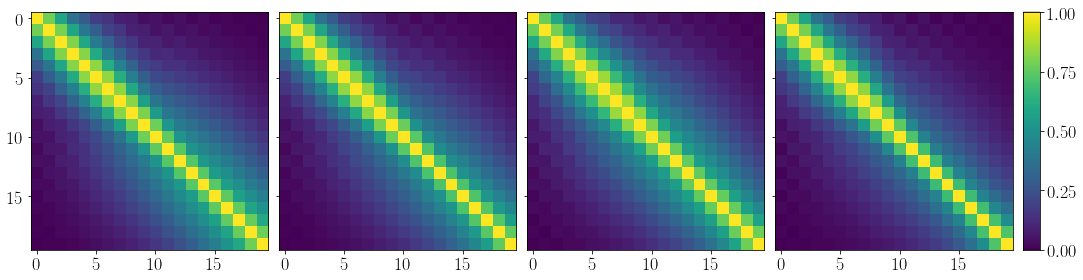

In [16]:
import scipy.interpolate as interpolate
from twobessel import *
from mpl_toolkits.axes_grid1 import ImageGrid
def QR_inverse(matrix):
    _Q,_R = np.linalg.qr(matrix)
    return np.dot(_Q,np.linalg.inv(_R.T))

def get_corr(cov):
    corr = np.zeros(cov.shape)
    for ii in range(0, cov.shape[0]):
        for jj in range(0, cov.shape[1]):
            corr[ii, jj] = cov[ii, jj] / np.sqrt(cov[ii, ii] * cov[jj, jj])
    return corr
    

try:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'))
except:
    df = pk.load(open('/Volumes/HD/Users/shivam/Dropbox/Research/ACTxDESY3/src_old/results/results.pkl','rb'),encoding='latin1')

block_res = np.load('/Users/shivam/Downloads/results_block_ell_gty_plancky3_beamed_v2_nfw_bt1_testcov_matchth_nocov.npz')

# get ell and Cl space gaussian covariance
isodd = 0
ell_temp = block_res['theory_ell_survey']

if np.mod(len(ell_temp),2) > 0:
    isodd = 1
    ell = block_res['theory_ell_survey'][:-1]
    print(len(ell),len(ell_temp))
else:
    ell = block_res['theory_ell_survey']


print(np.mod(len(ell_temp),2))    
# ell = log_extrap(ell, 10,10)
nl = len(ell)
dlnk = np.log(ell[1]/ell[0])
ell_mat = np.tile(ell.reshape(nl,1),(1,nl))
ell1_ell2 = ell_mat * ell_mat.T


nbins = 4
bins = (np.arange(4) + 1).astype(int)
# fig, ax = pl.subplots(1,4, figsize = (15,4),sharex=True,sharey='row')
fig = pl.figure(figsize=(15,4))
grid = ImageGrid(fig, 111,          # as in plt.subplot(111)
                 nrows_ncols=(1,4),
                 axes_pad=0.15,
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="7%",
                 cbar_pad=0.15,
                 )
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(1):    
    for j2 in range(4):

        wtheta_yk_Plancky3_beamed = wtheta_yk_dict_Plancky3_beamed[ str(bins[j2]) + '-tot']
        wtheta_ygt_Plancky3_beamed = wtheta_ygt_dict_Plancky3_beamed[ str(bins[j2]) + '-tot']
        wtheta_kk_Plancky3_beamed = wtheta_kk_dict_Plancky3_beamed[ str(bins[j2]) + '-tot']

        wtheta_yk_Plancky3_beamed_LeBrun_Ref = wtheta_yk_dict_Plancky3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        wtheta_ygt_Plancky3_beamed_LeBrun_Ref = wtheta_ygt_dict_Plancky3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        wtheta_kk_Plancky3_beamed_LeBrun_Ref = wtheta_kk_dict_Plancky3_beamed_LeBrun_Ref[ str(bins[j2]) + '-tot']
        
        
        
        wtheta_yk_Plancky3_beamed_LeBrun_AGN8 = wtheta_yk_dict_Plancky3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        wtheta_ygt_Plancky3_beamed_LeBrun_AGN8 = wtheta_ygt_dict_Plancky3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        wtheta_kk_Plancky3_beamed_LeBrun_AGN8 = wtheta_kk_dict_Plancky3_beamed_LeBrun_AGN8[ str(bins[j2]) + '-tot']
        
        theta = wtheta_yk_dict_Plancky3_beamed_LeBrun_Ref['theta_arcmin']
    
        if j1 == 0:

            
            
            if isodd:
                cov_total = block_res['cov_total_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])][:-1,:][:,:-1]
            else:
                cov_total = block_res['cov_total_ky_ky_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
            t1, t2, cov_fft = newtwobessel.two_Bessel_binave(2,2,dlnk,dlnk)

            th_theory_cov = (t1[:-1]+t1[1:])/2./np.pi*180*60
            ind_sel = np.where( (th_theory_cov > 2.5) & (th_theory_cov < 250.) )[0]
            theory_cov = cov_fft[ind_sel,:][:,ind_sel]
    
            
            im = grid[j2].imshow(get_corr(theory_cov))

        
#         if j1 == 0:
#             ax[j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
#             ticks  = np.array([2,3,10,50,200])
#             labels_bottom = ticks
#             ax[0].set_xticks(ticks)
#             ax[0].set_xticklabels(labels_bottom,  fontsize=15)
#             ax[1].set_xticks(ticks)
#             ax[1].set_xticklabels(labels_bottom,  fontsize=15)
            
#         ax[j2].tick_params(axis='both', which='minor', labelsize=15)    
#         ax[j2].tick_params(axis='both', which='major', labelsize=15)
# #         ax[0,0].legend(fontsize = 18, frameon = False)
#         ax[j2].set_xlim((2.,210))
        

# #         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
#         ax[j2].text( 0.5, 0.1,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
# #         ax[1].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
# #         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

    
# fig.subplots_adjust(bottom=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# Colorbar
grid[j2].cax.colorbar(im)
grid[j2].cax.toggle_label(True)
# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
# ax[0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ratio', size = 20)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
# ax[2,0].set_ylabel(r'$\xi_{\kappa \kappa}(\theta)$ ', size = 22)
# ax[3].legend(fontsize=13,frameon=False)
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_yk_ygt_allbins_model_planckxy3_ratio.png',dpi=240)
# fig.savefig('xi_yk_ygt_allbins_model_planckxy3_ratio.pdf')



















In [24]:
arcmin2rad = (1./60.)*(np.pi/180.)

# print((0.25**2)*(1./1.47)*(arcmin2rad**2) )
sigmae = 0.422 * np.sqrt(2.)
neff = 1.843

print((sigmae**2)*(1./neff)*(arcmin2rad**2) )


1.6352411100649966e-08


In [20]:
sigmae = 0.27 * np.sqrt(2.)
neff = 1.625

print((sigmae**2)*(1./neff)*(arcmin2rad**2) )




7.592003385453353e-09


In [55]:
thed = np.logspace(np.log10(2.5),np.log10(250),21)
thcen = (thed[1:] + thed[:-1])/2.
print(np.log(thcen[1]/thcen[0]),np.log(thed[1]/thed[0]))



0.2302585092994046 0.23025850929940445


In [61]:
len(np.exp(np.arange(np.log(1e-4), np.log(500000.),0.23025)))



97

SNR y-gt bin1=8.32 sigma
SNR y-gt bin2=11.56 sigma
SNR y-gt bin3=15.04 sigma
SNR y-gt bin4=10.97 sigma


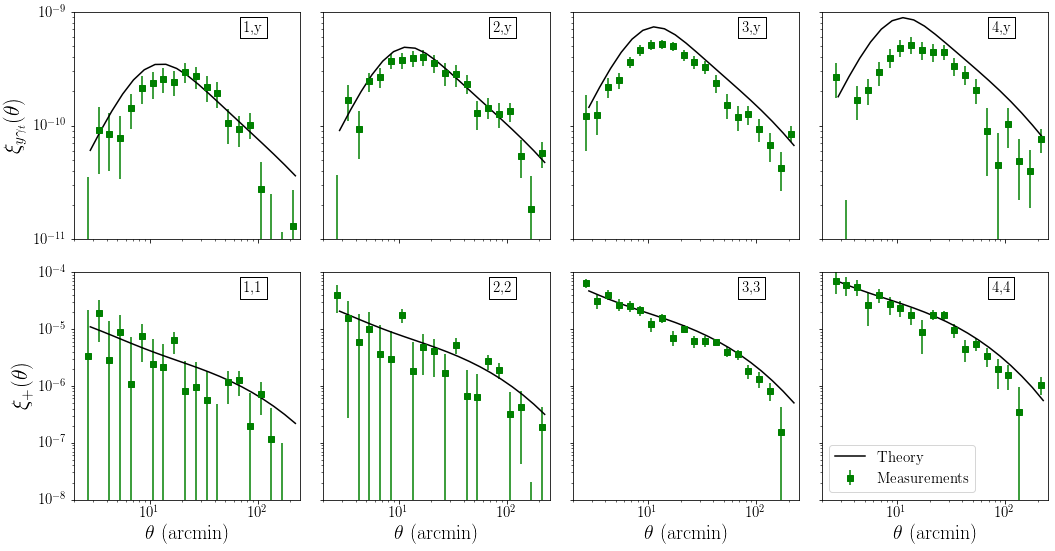

In [51]:
nbins = 4
bins = (np.arange(4) + 1).astype(int)
fig, ax = pl.subplots(2,4, figsize = (15,8),sharex=True,sharey='row')
jc = 0
texts_kk = [r'1,1',r'2,2',r'3,3',r'4,4']
texts_ky = [r'1,y',r'2,y',r'3,y',r'4,y']
for j1 in range(2):    
    for j2 in range(4):

        if j1 == 0:
            
            wt_gty = block_res['theory_wgty_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            theta = block_res['theory_theta']
            
            
            ax[j1,j2].errorbar(theta, wt_gty,  ls='-',color='k',label='Theory')
            
            yk_g = df['Yshear_y1'][str(j2)]['xip']
            yk_th_g = df['Yshear_y1'][str(j2)]['theta'] * 180./np.pi
            yk_err = df['Yshear_y1'][str(j2)]['err']
            
            yk_cov = df['Yshear_y1'][str(j2)]['cov']
            inv_cov_bin = QR_inverse(yk_cov)
            snr_bin = np.sqrt(np.dot(np.array([yk_g]), np.dot(inv_cov_bin, np.array([yk_g]).T)))
            print('SNR y-gt bin' + str(j2+1)  + '=' + str(np.round(snr_bin[0][0],2)) + ' sigma')
            
            ax[j1,j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='green',label='Measurements')
            ax[j1,j2].set_ylim(1e-11,1e-9)
            
            
            
        if j1 == 1:
            yk_g = df['shearshear_y1'][str(j2)+'_'+str(j2)]['xip']
            yk_th_g = df['shearshear_y1'][str(j2)+'_'+str(j2)]['theta'] * 180. /np.pi
            yk_err = df['shearshear_y1'][str(j2)+'_'+str(j2)]['err']
#             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='o',color='blue',label='DES Y1')

            wt_kk = block_res['theory_wkk_bin_' + str(bins[j2]) + '_' + str(bins[j2])]
            theta = block_res['theory_theta']
            ax[j1,j2].errorbar(yk_th_g, yk_g,yerr=yk_err, ls='',marker='s',color='green',label='Measurements')
            ax[j1,j2].plot(theta, wt_kk , ls='-',color='k',label='Theory')
#             ax[j1,j2].errorbar(data_ang, data_val,yerr= sig, ls='',marker='s',color='green',label='DES Y1')
#             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-1h'] , ls=':',color='k',label='1-Halo')
#             ax[j1,j2].errorbar(theta, wtheta_kk_dict[ str(bins[j2]) + '-2h'] , ls='--',color='k',label='2-Halo')
            ax[j1,j2].set_ylim(1e-8,1e-4)
            
        ax[j1,j2].set_xscale('log')
        ax[j1,j2].set_yscale('log')
        
        if j1 == 1:
            ax[j1,j2].set_xlabel(r'$\theta$ (arcmin)', size = 20)
#             ticks  = np.array([2,5,10,30,100,200])
#             labels_bottom = ticks
#             ax[0,j2].set_xticks(ticks)
#             ax[0,j2].set_xticklabels(labels_bottom,  fontsize=15)
#             ax[1,j2].set_xticks(ticks)
#             ax[1,j2].set_xticklabels(labels_bottom,  fontsize=15)
            
        ax[j1,j2].tick_params(axis='both', which='minor', labelsize=15)    
        ax[j1,j2].tick_params(axis='both', which='major', labelsize=15)
#         ax[0,0].legend(fontsize = 18, frameon = False)
        ax[j1,j2].set_xlim((2,250))
        

#         ax[j1,j2].text( 0.55, 0.96,labels[jc], verticalalignment='top', horizontalalignment='left', transform=ax[j1,j2].transAxes, fontsize=15)
        ax[0,j2].text( 0.75, 0.96,texts_ky[j2], verticalalignment='top', horizontalalignment='left', transform=ax[0,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
        ax[1,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[1,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))    
#         ax[2,j2].text( 0.75, 0.96,texts_kk[j2], verticalalignment='top', horizontalalignment='left', transform=ax[2,j2].transAxes, fontsize=15, bbox=dict(facecolor='white', edgecolor='black'))


        jc += 1

# yticks  = np.array([-0.45,-0.3,-0.15,0.00,0.15,0.3,0.45])
# labels_bottom = yticks
# ax[0,0].set_yticks(yticks)
# ax[0,0].set_yticklabels(labels_bottom,  fontsize=15)
# ax[1,0].set_yticks(yticks)
# ax[1,0].set_yticklabels(labels_bottom,  fontsize=15)


# ax[0,0].set_ylabel(r'$\xi_{\rm mm}$ comparison', size = 22)
ax[0,0].set_ylabel(r'$\xi_{y\gamma_t}(\theta)$ ', size = 22)
# ax[1,0].set_ylabel(r'$\xi_{y\kappa}(\theta)$ ', size = 22)
ax[1,0].set_ylabel(r'$\xi_{+}(\theta)$ ', size = 22)
ax[1,3].legend(fontsize=15,loc='lower left')
#     ax[1,j].tick_params(axis='both', which='major', labelsize=15)



pl.tight_layout()

# fig.savefig('xi_ygt_kk_allbins.pdf')
# fig.savefig('xi_ygt_kk_allbins.png',dpi=240)













In [110]:


# load data
df = np.load('/Users/shivam/Downloads/results_block_ell_gty_acty3_beamed_v2_nfw_bt1_testcov_matchth.npz')

# get ell and Cl space gaussian covariance
ell = df['theory_ell'][:-1]
nl = len(ell)
Cl_kk_11 = df['theory_clkk_bin_1_1'][:-1]
cov_total = df['covg_kk_kk_bin_1_1'][:-1,:][:,:-1]
ell_mat = np.tile(ell.reshape(nl,1),(1,nl))
ell1_ell2 = ell_mat * ell_mat.T

# compute the transformation
mytwobessel = twobessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(2*np.pi)**2), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)   
dlnk = np.log(ell[1]/ell[0])
t1, t2, cov_fft = mytwobessel.two_Bessel_binave(0,0, dlnk, dlnk)

# comparison to precomputed covariance
th = df['theory_theta'] 
cov_g = df['real_covg_kk_kk_bin_1_1']


88 88
(2088, 2088)
2088 2088


In [111]:
ell


array([1.05819000e+00, 1.18134217e+00, 1.31882678e+00, 1.47231185e+00,
       1.64365951e+00, 1.83494862e+00, 2.04849995e+00, 2.28690439e+00,
       2.55305435e+00, 2.85017883e+00, 3.18188267e+00, 3.55219020e+00,
       3.96559412e+00, 4.42711000e+00, 4.94233710e+00, 5.51752633e+00,
       6.15965608e+00, 6.87651691e+00, 7.67680600e+00, 8.57023275e+00,
       9.56763650e+00, 1.06811181e+01, 1.19241867e+01, 1.33119237e+01,
       1.48611655e+01, 1.65907080e+01, 1.85215348e+01, 2.06770711e+01,
       2.30834688e+01, 2.57699231e+01, 2.87690270e+01, 3.21171666e+01,
       3.58549627e+01, 4.00277635e+01, 4.46861949e+01, 4.98867747e+01,
       5.56925979e+01, 6.21741029e+01, 6.94099255e+01, 7.74878532e+01,
       8.65058902e+01, 9.65734464e+01, 1.07812665e+02, 1.20359904e+02,
       1.34367390e+02, 1.50005068e+02, 1.67462659e+02, 1.86951965e+02,
       2.08709436e+02, 2.32999042e+02, 2.60115472e+02, 2.90387713e+02,
       3.24183037e+02, 3.61911462e+02, 4.04030721e+02, 4.51051819e+02,
      

In [112]:
[*df.keys()]


['bin_1',
 'bin_2',
 'bin_3',
 'bin_4',
 'bin_5',
 'nbin',
 'nz',
 'z',
 'nbar--1',
 'nbar--2',
 'nbar--3',
 'nbar--4',
 'nbar--5',
 'noisek--1',
 'noisek--2',
 'noisek--3',
 'noisek--4',
 'cov_total_kk_kk_bin_1_1',
 'cov_total_kk_kk_bin_2_2',
 'cov_total_kk_kk_bin_3_3',
 'cov_total_kk_kk_bin_4_4',
 'cov_total_ky_ky_bin_1_1',
 'cov_total_ky_ky_bin_2_2',
 'cov_total_ky_ky_bin_3_3',
 'cov_total_ky_ky_bin_4_4',
 'cov_total_yy_yy',
 'covg_kk_kk_bin_1_1',
 'covg_kk_kk_bin_2_2',
 'covg_kk_kk_bin_3_3',
 'covg_kk_kk_bin_4_4',
 'covg_ky_ky_bin_1_1',
 'covg_ky_ky_bin_2_2',
 'covg_ky_ky_bin_3_3',
 'covg_ky_ky_bin_4_4',
 'covg_yy_yy',
 'covng_kk_kk_bin_1_1',
 'covng_kk_kk_bin_2_2',
 'covng_kk_kk_bin_3_3',
 'covng_kk_kk_bin_4_4',
 'covng_ky_ky_bin_1_1',
 'covng_ky_ky_bin_2_2',
 'covng_ky_ky_bin_3_3',
 'covng_ky_ky_bin_4_4',
 'covng_yy_yy',
 'ntheta',
 'real_covg_gty_gty_bin_1_1',
 'real_covg_gty_gty_bin_2_2',
 'real_covg_gty_gty_bin_3_3',
 'real_covg_gty_gty_bin_4_4',
 'real_covg_kk_kk_bin_1_1',
 '

In [113]:
cov_fft



array([[ 6.44041517e-14,  6.29006138e-14,  6.12059799e-14, ...,
         1.27073059e-17,  1.53247227e-18, -6.31463901e-18],
       [ 6.28964719e-14,  6.15241006e-14,  5.98599667e-14, ...,
         1.39162728e-17,  3.06526858e-18, -5.39077324e-18],
       [ 6.12058539e-14,  5.98637877e-14,  5.83453039e-14, ...,
         1.27487573e-17,  1.61781945e-18, -6.28401951e-18],
       ...,
       [ 1.25199064e-17,  1.40584021e-17,  1.25801973e-17, ...,
         1.08737215e-16,  7.95608295e-17,  4.36490207e-17],
       [ 1.79238783e-18,  2.85266946e-18,  1.85113490e-18, ...,
         7.95601295e-17,  9.33043131e-17,  6.56297647e-17],
       [-6.48837500e-18, -5.25783971e-18, -6.44025418e-18, ...,
         4.36490735e-17,  6.56303405e-17,  8.00514663e-17]])

In [121]:
from twobessel import two_sph_bessel



ImportError: cannot import name 'two_sph_bessel' from 'twobessel' (/Users/shivam/Dropbox/research/ACTxDESY3/src_old/cosmosis_code/twobessel.py)

NameError: name 'two_sph_bessel' is not defined

In [118]:

import matplotlib.pyplot as plt
# load data
df = np.load('/Users/shivam/Downloads/results_block_ell_gty_acty3_beamed_v2_nfw_bt1_testcov_matchth.npz')

# get ell and Cl space gaussian covariance
ell = df['theory_ell'][:-1]
print(ell)
ell = log_extrap(ell, 10,10)
nl = len(ell)
dlnk = np.log(ell[1]/ell[0])
print(dlnk)
Cl_kk_11 = df['theory_clkk_bin_1_1'][:-1]
cov_total = df['covg_kk_kk_bin_1_1'][:-1,:][:,:-1]

cov_total = np.diag(log_extrap(np.diag(cov_total), 10, 10))
ell_mat = np.tile(ell.reshape(nl,1),(1,nl))
ell1_ell2 = ell_mat * ell_mat.T

print(cov_total)
# print(Cl_kk_11)
# exit()

# compute the transformation
mytwobessel = two_sph_bessel(ell, ell, cov_total*(ell1_ell2**2.5) * (1./(2*np.pi**3)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)

t1, t2, cov_fft = mytwobessel.two_sph_bessel(-0.5,-0.5)
t_mat = np.tile(t1.reshape(nl,1),(1,nl))
cov_fft *= np.sqrt(t_mat * t_mat.T)

# comparison to precomputed covariance
th = df['theory_theta'] 
cov_g = df['real_covg_kk_kk_bin_1_1']

# print(t1/np.pi*180*60 ,np.diag(cov_fft))
# print(th, np.diag(cov_g))
# plt.plot(t1/np.pi*180*60, np.diag(cov_fft))
plt.plot(th, np.diag(cov_g))
# t1, t2, cov_fft = mytwobessel.two_sph_bessel_binave(-0.5,-0.5,dlnk,dlnk)
# cov_fft *= np.sqrt(t_mat * t_mat.T)
# plt.plot(t1/np.pi*180*60, np.diag(cov_fft))

mytwobessel = two_sph_bessel(ell, ell, cov_total*(ell1_ell2**2.5) * (1./(2*np.pi**3)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
t1, t2, cov_fft = mytwobessel.two_Bessel_binave(0,0,dlnk,dlnk)
# plt.plot(t1/np.pi*180*60, np.diag(cov_fft))
plt.plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.diag(cov_fft)[:-1])

newtwobessel = two_Bessel(ell, ell, cov_total*(ell1_ell2**2) * (1./(4*np.pi**2)), nu1=1.01, nu2=1.01, N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=1000)
t1, t2, cov_fft = newtwobessel.two_Bessel_binave(0,0,dlnk,dlnk)
# plt.plot(t1/np.pi*180*60, np.diag(cov_fft))
plt.plot((t1[:-1]+t1[1:])/2./np.pi*180*60, np.diag(cov_fft)[:-1])


plt.xlim(1,300)
plt.xscale('log')
plt.yscale('log')
plt.show()





[1.05819000e+00 1.18134217e+00 1.31882678e+00 1.47231185e+00
 1.64365951e+00 1.83494862e+00 2.04849995e+00 2.28690439e+00
 2.55305435e+00 2.85017883e+00 3.18188267e+00 3.55219020e+00
 3.96559412e+00 4.42711000e+00 4.94233710e+00 5.51752633e+00
 6.15965608e+00 6.87651691e+00 7.67680600e+00 8.57023275e+00
 9.56763650e+00 1.06811181e+01 1.19241867e+01 1.33119237e+01
 1.48611655e+01 1.65907080e+01 1.85215348e+01 2.06770711e+01
 2.30834688e+01 2.57699231e+01 2.87690270e+01 3.21171666e+01
 3.58549627e+01 4.00277635e+01 4.46861949e+01 4.98867747e+01
 5.56925979e+01 6.21741029e+01 6.94099255e+01 7.74878532e+01
 8.65058902e+01 9.65734464e+01 1.07812665e+02 1.20359904e+02
 1.34367390e+02 1.50005068e+02 1.67462659e+02 1.86951965e+02
 2.08709436e+02 2.32999042e+02 2.60115472e+02 2.90387713e+02
 3.24183037e+02 3.61911462e+02 4.04030721e+02 4.51051819e+02
 5.03545234e+02 5.62147832e+02 6.27570601e+02 7.00607273e+02
 7.82143953e+02 8.73169872e+02 9.74789389e+02 1.08823539e+03
 1.21488423e+03 1.356272

NameError: name 'two_sph_bessel' is not defined

In [95]:
t1l = np.log(t1*(180./np.pi)*60.)
print(t1l[2] - t1l[1])

thl = np.log(th)
print(th[1] - th[0])




0.11009131502110425
0.25046374722182474


In [66]:
theta_min = 2.5
theta_max = 250.
ntheta = 20.

theta_arr_arcmin = np.logspace(np.log10(theta_min), np.log10(theta_max), ntheta)
theta_arr_rad = theta_arr_arcmin * (np.pi/180.) * (1./60.)
l_arr = 1./theta_arr_rad
l_arr_log = np.log(l_arr)
dl_arr_log = l_arr_log[0] - l_arr_log[1]
l_arr_new = np.exp(np.arange(np.min(l_arr_log),np.max(l_arr_log),dl_arr_log))
theta_arr_new = (1./l_arr_new) * (180./np.pi) * 60.




[250.         196.18999259 153.96205277 120.82325596  94.81725477
  74.40878604  58.39303673  45.82451777  35.96124721  28.22094729
  22.14666976  17.3798199   13.63898695  10.703331     8.39954572
   6.59162725   5.1728452    4.05944185   3.18568746   2.5       ]


In [68]:
l_arr_new


array([  13.75098708,   17.52253887,   22.32853297,   28.45269103,
         36.25655245,   46.20081786,   58.87254651,   75.01981337,
         95.59587161,  121.81542792,  155.22635268,  197.80105834,
        252.05294078,  321.18475751,  409.27770229,  521.53233823,
        664.57561284,  846.85207955, 1079.12242157, 1375.09870831])

In [69]:
t1*(180./np.pi)*60.




array([2.24937479e-01, 2.51115705e-01, 2.80340553e-01, 3.12966589e-01,
       3.49389643e-01, 3.90051612e-01, 4.35445822e-01, 4.86123010e-01,
       5.42698010e-01, 6.05857209e-01, 6.76366876e-01, 7.55082458e-01,
       8.42958961e-01, 9.41062531e-01, 1.05058340e+00, 1.17285030e+00,
       1.30934663e+00, 1.46172840e+00, 1.63184436e+00, 1.82175842e+00,
       2.03377468e+00, 2.27046540e+00, 2.53470218e+00, 2.82969084e+00,
       3.15901028e+00, 3.52665592e+00, 3.93708817e+00, 4.39528652e+00,
       4.90681000e+00, 5.47786459e+00, 6.11537851e+00, 6.82708631e+00,
       7.62162267e+00, 8.50862718e+00, 9.49886128e+00, 1.06043388e+01,
       1.18384719e+01, 1.32162333e+01, 1.47543387e+01, 1.64714487e+01,
       1.83883960e+01, 2.05284377e+01, 2.29175375e+01, 2.55846807e+01,
       2.85622260e+01, 3.18862981e+01, 3.55972257e+01, 3.97400312e+01,
       4.43649763e+01, 4.95281726e+01, 5.52922617e+01, 6.17271756e+01,
       6.89109848e+01, 7.69308458e+01, 8.58840582e+01, 9.58792456e+01,
      

In [71]:
np.logspace(np.log10(2.03377468),np.log10(231.324170),44)

array([  2.03377468,   2.27046539,   2.53470217,   2.82969083,
         3.15901028,   3.52665592,   3.93708816,   4.39528651,
         4.90680999,   5.47786458,   6.1153785 ,   6.8270863 ,
         7.62162266,   8.50862717,   9.49886127,  10.60433882,
        11.83847186,  13.21623331,  14.75433864,  16.47144869,
        18.38839603,  20.5284377 ,  22.91753745,  25.58468064,
        28.56222598,  31.88629807,  35.5972257 ,  39.74003111,
        44.36497625,  49.52817254,  55.29226166,  61.72717552,
        68.91098471,  76.93084566,  85.8840581 ,  95.87924547,
       107.03767283, 119.49471806, 133.40151431, 148.92678362,
       166.2588839 , 185.60809414, 207.20916563, 231.32417   ])

In [79]:
t1


array([6.54316604e-05, 7.30465976e-05, 8.15477612e-05, 9.10382903e-05,
       1.01633327e-04, 1.13461415e-04, 1.26666055e-04, 1.41407452e-04,
       1.57864452e-04, 1.76236718e-04, 1.96747149e-04, 2.19644584e-04,
       2.45206822e-04, 2.73743994e-04, 3.05602322e-04, 3.41168323e-04,
       3.80873495e-04, 4.25199556e-04, 4.74684283e-04, 5.29928044e-04,
       5.91601074e-04, 6.60451612e-04, 7.37314976e-04, 8.23123699e-04,
       9.18918841e-04, 1.02586262e-03, 1.14525252e-03, 1.27853702e-03,
       1.42733317e-03, 1.59344622e-03, 1.77889150e-03, 1.98591891e-03,
       2.21704017e-03, 2.47505932e-03, 2.76310674e-03, 3.08467713e-03,
       3.44367188e-03, 3.84444644e-03, 4.29186314e-03, 4.79135021e-03,
       5.34896759e-03, 5.97148048e-03, 6.66644142e-03, 7.44228193e-03,
       8.30841476e-03, 9.27534814e-03, 1.03548132e-02, 1.15599065e-02,
       1.29052485e-02, 1.44071614e-02, 1.60838670e-02, 1.79557075e-02,
       2.00453929e-02, 2.23782759e-02, 2.49826598e-02, 2.78901420e-02,
      

In [80]:
th


array([  2.15212004,   2.40258378,   2.6821965 ,   2.99435055,
         3.3428331 ,   3.73187204,   4.16618734,   4.65104825,
         5.19233729,   5.79662154,   6.4712324 ,   7.22435448,
         8.06512492,   9.00374422,  10.05160004,  11.22140534,
        12.52735258,  13.98528597,  15.61289367,  17.42992236,
        19.45841686,  21.72298758,  24.25110904,  27.07345331,
        30.22426203,  33.74176188,  37.6686284 ,  42.05250368,
        46.9465744 ,  52.4102171 ,  58.50971859,  65.31908011,
        72.92091518,  81.40745188,  90.88165178, 101.45845915,
       113.26619545, 126.44811618, 141.16414896, 157.59283376,
       175.93348902, 196.40862989, 219.26666782])